# Training and comparison

Objective: Trainining of multiple models using the data and comparison of the results

In [1]:
#Importing most used modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
sns.set_palette('viridis')
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

Loading the datasets

In [2]:
#Loading the datasets
test_sets = ['numeric','categoricals_binned','one_hot_encoded','outliers_removed',
             'one_hot_encoded_rescaled','oversampled+','oversampled-','smoted+','smoted-']
datasets = {}
for key in test_sets:
    datasets[key] = pd.read_csv(f'datasets/{key}.csv')

In [3]:
#Defining the X,y spliter for ease of use
def df_splitter(dataset, target = 'Response'):
    X = dataset.drop(columns=[target])
    y = dataset[target].values
    return X, y

In [4]:
# Defining the printing function
def display_scores(scores):
    print("Scores:", scores)
    print("\nMean:", scores.mean())
    print("Standard deviation:", scores.std())

## Models

## Dataset tests
Since we have some datasets options, we will try a first run of t

In [5]:
first_results = []

#### K-Neighbors Classifier

In [6]:
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    knn_test = cross_val_score(knn_clf,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'KNN', 'dataset':key, 'score':knn_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(knn_test)


-----
Dataset: numeric
Scores: [0.71228536 0.71211675 0.71491745]

Mean: 0.7131065181467098
Standard deviation: 0.0012823729935557734

-----
Dataset: categoricals_binned
Scores: [0.71059032 0.70769458 0.71005307]

Mean: 0.7094459858904245
Standard deviation: 0.0012577064482832434

-----
Dataset: one_hot_encoded
Scores: [0.71022183 0.70850531 0.70953715]

Mean: 0.7094214273332063
Standard deviation: 0.0007055284432189075

-----
Dataset: outliers_removed
Scores: [0.71475655 0.70724399 0.71301221]

Mean: 0.711670917757777
Standard deviation: 0.00321029198290776

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.71464367 0.71395932 0.71587559]

Mean: 0.7148261929129059
Standard deviation: 0.0007928897487709854

-----
Dataset: oversampled+
Scores: [0.62038204 0.6198303  0.6208    ]

Mean: 0.620337448371037
Standard deviation: 0.0003971309629555497

-----
Dataset: oversampled-
Scores: [0.61266322 0.611905   0.6137282 ]

Mean: 0.6127654698725807
Standard deviation: 0.0007478214047553315

--

#### Naive Bayes (Gaussian)

In [7]:
nbg_clf = GaussianNB()
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    nbg_test = cross_val_score(nbg_clf,X_train,y_train, n_jobs=-1, cv=5, scoring='accuracy')
    first_results.append({'model':'Naive Bayes', 'dataset':key, 'score':nbg_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(nbg_test)


-----
Dataset: numeric
Scores: [0.75592679 0.74695983 0.74462597 0.75113622 0.74695983]

Mean: 0.7491217295172583
Standard deviation: 0.003998162378626328

-----
Dataset: categoricals_binned
Scores: [0.75690947 0.74953937 0.74376612 0.75224174 0.746837  ]

Mean: 0.749858739712566
Standard deviation: 0.004510973372125921

-----
Dataset: one_hot_encoded
Scores: [0.75506695 0.74941653 0.7443803  0.7492937  0.74867952]

Mean: 0.7493673995823609
Standard deviation: 0.003401088891060924

-----
Dataset: outliers_removed
Scores: [0.75418227 0.75156055 0.74956305 0.75402672 0.7445374 ]

Mean: 0.7507739966071254
Standard deviation: 0.003554625483263591

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.72583221 0.72976293 0.72816607 0.71919912 0.72288417]

Mean: 0.725168898169758
Standard deviation: 0.003778530191324014

-----
Dataset: oversampled+
Scores: [0.52828054 0.53139394 0.53373737 0.52711111 0.52864646]

Mean: 0.5298338863750629
Standard deviation: 0.0024044679324950508

-----
Dataset

#### Support Vector Machine

In [9]:
svm = SVC(random_state = 1216, C = 1.0, cache_size = 4096)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    svc_test = cross_val_score(svm,X_train,y_train, n_jobs=-1, cv=2, scoring='accuracy')
    first_results.append({'model':'Support Vector Machine', 'dataset':key, 'score':svc_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(svc_test)


-----
Dataset: numeric
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: categoricals_binned
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: one_hot_encoded
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: outliers_removed
Scores: [0.76038753 0.76038753]

Mean: 0.7603875349580503
Standard deviation: 0.0

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.76037931 0.76036753]

Mean: 0.7603734183543323
Standard deviation: 5.88690779129708e-06

-----
Dataset: oversampled+
Scores: [0.5166462  0.53096516]

Mean: 0.5238056758678648
Standard deviation: 0.007159480250824246

-----
Dataset: oversampled-
Scores: [0.50775245 0.50517394]

Mean: 0.5064631951570698
Standard deviation: 0.0012892521197188644

-----
Dataset: smoted+
Scores: [0.67318508 0.66920939]

Mean: 0.6711972331760294
Standard deviatio

#### Decision Trees

In [12]:
dtc = DecisionTreeClassifier(random_state=1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    dtc_test = cross_val_score(dtc,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Default cv value = 5
    first_results.append({'model':'Decision Tree', 'dataset':key, 'score':dtc_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(dtc_test)


-----
Dataset: numeric
Scores: [0.66195003 0.66384139 0.66376769]

Mean: 0.6631863711175029
Standard deviation: 0.0008747406010030579

-----
Dataset: categoricals_binned
Scores: [0.63026015 0.63509729 0.63760318]

Mean: 0.6343202078382513
Standard deviation: 0.003047722663274115

-----
Dataset: one_hot_encoded
Scores: [0.64713686 0.64725825 0.64954304]

Mean: 0.6479793844129307
Standard deviation: 0.0011067834046584052

-----
Dataset: outliers_removed
Scores: [0.64539326 0.64281969 0.6404225 ]

Mean: 0.6428784829510718
Standard deviation: 0.002029728015538005

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.64706316 0.64718455 0.64946934]

Mean: 0.647905683393311
Standard deviation: 0.0011067820263821067

-----
Dataset: oversampled+
Scores: [0.77557452 0.77260606 0.7785697 ]

Mean: 0.7755834250583015
Standard deviation: 0.0024346524976599873

-----
Dataset: oversampled-
Scores: [0.7694506  0.77303637 0.77313492]

Mean: 0.7718739619164352
Standard deviation: 0.00171404536073089

---

#### Extra Trees

In [15]:
extrees = ExtraTreesClassifier(n_jobs=-1, random_state=1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Default cv value = 5
    first_results.append({'model':'Extra Trees', 'dataset':key, 'score':extrees_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(extrees_test)


-----
Dataset: numeric
Scores: [0.74839708 0.74985259 0.75081073]

Mean: 0.7496868023515727
Standard deviation: 0.0009923175815198183

-----
Dataset: categoricals_binned
Scores: [0.73793205 0.73776533 0.73540684]

Mean: 0.7370347402699734
Standard deviation: 0.0011531100974619445

-----
Dataset: one_hot_encoded
Scores: [0.71648611 0.72435142 0.72199292]

Mean: 0.7209434825543427
Standard deviation: 0.0032956294397047925

-----
Dataset: outliers_removed
Scores: [0.71857678 0.72222638 0.71848079]

Mean: 0.7197613160341841
Standard deviation: 0.0017435067655318006

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.71648611 0.72435142 0.72199292]

Mean: 0.7209434825543427
Standard deviation: 0.0032956294397047925

-----
Dataset: oversampled+
Scores: [0.83142636 0.83515152 0.83369697]

Mean: 0.8334249466447662
Standard deviation: 0.0015329061255170064

-----
Dataset: oversampled-
Scores: [0.83439271 0.82925988 0.83753819]

Mean: 0.8337302586526795
Standard deviation: 0.003411913276928968


#### Random Forest

In [18]:
rnd_clf = RandomForestClassifier(n_estimators=70,
                                 max_leaf_nodes=None,
                                 bootstrap=True,
                                 oob_score=True,n_jobs = -1,
                                 random_state = 1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    rnd_clf_test = cross_val_score(rnd_clf,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'Random Forest', 'dataset':key, 'score':rnd_clf_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(rnd_clf_test)


-----
Dataset: numeric
Scores: [0.75488245 0.75670696 0.7550855 ]

Mean: 0.7555583018265367
Standard deviation: 0.0008164410781646076

-----
Dataset: categoricals_binned
Scores: [0.7478812  0.7499263  0.74985259]

Mean: 0.7492200304343605
Standard deviation: 0.0009471742677313469

-----
Dataset: one_hot_encoded
Scores: [0.74471221 0.75051592 0.75014741]

Mean: 0.7484585123768754
Standard deviation: 0.002653303283560516

-----
Dataset: outliers_removed
Scores: [0.74883895 0.75016855 0.75031838]

Mean: 0.7497752930568754
Standard deviation: 0.0006649128782569847

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.74478591 0.75051592 0.7500737 ]

Mean: 0.7484585105663065
Standard deviation: 0.002603189114267456

-----
Dataset: oversampled+
Scores: [0.82846892 0.83612121 0.8326303 ]

Mean: 0.8324068126234713
Standard deviation: 0.003128028585296697

-----
Dataset: oversampled-
Scores: [0.83178123 0.82743668 0.82970336]

Mean: 0.8296404227649076
Standard deviation: 0.0017742117696808272

-

#### AdaBoost

In [22]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.8, random_state = 1216)
for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    ada_boost_test = cross_val_score(ada_boost,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy')
    first_results.append({'model':'AdaBoost', 'dataset':key, 'score':ada_boost_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(ada_boost_test)


-----
Dataset: numeric
Scores: [0.75945169 0.75980248 0.75906545]

Mean: 0.7594398719611991
Standard deviation: 0.0003010065924008337

-----
Dataset: categoricals_binned
Scores: [0.75996757 0.75980248 0.75994988]

Mean: 0.7599066438784113
Standard deviation: 7.401075954548328e-05

-----
Dataset: one_hot_encoded
Scores: [0.75989388 0.75980248 0.75987618]

Mean: 0.7598575104688545
Standard deviation: 3.957989254669246e-05

-----
Dataset: outliers_removed
Scores: [0.76022472 0.76028167 0.76020676]

Mean: 0.760237715066819
Standard deviation: 3.193349830681007e-05

-----
Dataset: one_hot_encoded_rescaled
Scores: [0.75989388 0.75980248 0.75994988]

Mean: 0.7598820780789174
Standard deviation: 6.0753578180248605e-05

-----
Dataset: oversampled+
Scores: [0.56530592 0.56213333 0.55873939]

Mean: 0.5620595506113203
Standard deviation: 0.0026812825313568974

-----
Dataset: oversampled-
Scores: [0.56132052 0.55627279 0.55533655]

Mean: 0.5576432883196627
Standard deviation: 0.0026281390582369975

#### Visualizing the results

In [103]:
results = first_results
results = pd.DataFrame(results)
results = results.pivot(index='model', columns = 'dataset', values = 'score')
results = results.reindex(columns= [ 'numeric','categoricals_binned','one_hot_encoded','one_hot_encoded_rescaled','outliers_removed','oversampled+','oversampled-','smoted+','smoted-'])
results = results.reindex(['KNN', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree', 'Extra Trees', 'Random Forest', 'AdaBoost'])
results.style.background_gradient(cmap='bwr_r', low=0.7, high=0.8, axis=0)

dataset,numeric,categoricals_binned,one_hot_encoded,one_hot_encoded_rescaled,outliers_removed,oversampled+,oversampled-,smoted+,smoted-
model,,,,,,,,,
KNN,0.713107,0.709446,0.709421,0.714826,0.711671,0.620337,0.612765,0.616281,0.651036
Naive Bayes,0.749122,0.749859,0.749367,0.725169,0.750774,0.529834,0.534287,0.735228,0.634644
Support Vector Machine,0.760373,0.760373,0.760373,0.760373,0.760388,0.523806,0.506463,0.671197,0.505067
Decision Tree,0.663186,0.634320,0.647979,0.647906,0.642878,0.775583,0.771874,0.691771,0.738548
Extra Trees,0.749687,0.737035,0.720943,0.720943,0.719761,0.833425,0.833730,0.758517,0.786722
Random Forest,0.755558,0.749220,0.748459,0.748459,0.749775,0.832407,0.829640,0.770735,0.805545
AdaBoost,0.759440,0.759907,0.759858,0.759882,0.760238,0.562060,0.557643,0.755899,0.817929


### Improving the models

Reanalizing the best models

#### Extra Trees 1
'oversampled-' dataset

In [104]:
#Preparing the classifier
extra_tree = ExtraTreesClassifier(random_state=1216, n_jobs = -1)
X, y = df_splitter(datasets['oversampled-'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

In [127]:
#Setting the parameters for the grid search
#min_samples_split = np.array([2,3,4,5])
#max_depth = np.array([3,7,11,None])
#max_leaf_nodes = np.array([2,3,None])
min_samples_split = np.array([4,5])
max_depth = np.array([11,None])
max_leaf_nodes = np.array([None])
values_grid = {'min_samples_split': min_samples_split, 'max_depth': max_depth, 'max_leaf_nodes':max_leaf_nodes}

In [134]:
gridDecisionTree = GridSearchCV(estimator = extra_tree,
                                param_grid = values_grid,
                                cv = 2, verbose = 3,
                                scoring='accuracy',
                                pre_dispatch=-1)

In [135]:
gridDecisionTree.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END max_depth=11, max_leaf_nodes=None, min_samples_split=4;, score=0.630 total time=   2.1s
[CV 2/2] END max_depth=11, max_leaf_nodes=None, min_samples_split=4;, score=0.619 total time=   0.8s
[CV 1/2] END max_depth=11, max_leaf_nodes=None, min_samples_split=5;, score=0.630 total time=   0.9s
[CV 2/2] END max_depth=11, max_leaf_nodes=None, min_samples_split=5;, score=0.615 total time=   0.9s
[CV 1/2] END max_depth=None, max_leaf_nodes=None, min_samples_split=4;, score=0.773 total time=   2.1s
[CV 2/2] END max_depth=None, max_leaf_nodes=None, min_samples_split=4;, score=0.777 total time=   2.4s
[CV 1/2] END max_depth=None, max_leaf_nodes=None, min_samples_split=5;, score=0.767 total time=   2.0s
[CV 2/2] END max_depth=None, max_leaf_nodes=None, min_samples_split=5;, score=0.768 total time=   2.0s


GridSearchCV(cv=2, estimator=ExtraTreesClassifier(n_jobs=-1, random_state=1216),
             param_grid={'max_depth': array([11, None], dtype=object),
                         'max_leaf_nodes': array([None], dtype=object),
                         'min_samples_split': array([4, 5])},
             pre_dispatch=-1, scoring='accuracy', verbose=3)

#### Extra Trees 2
'oversampled+' dataset

In [56]:
#Preparing the classifier
extra_tree = ExtraTreesClassifier(random_state=1216)
X, y = df_splitter(datasets['oversampled+'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)

array([2, 3, 4, None], dtype=object)

In [50]:
#Testing the oversampled- dataset first
extra_tree = ExtraTreesClassifier(random_state=1216)

xtrees.fit(X_train,y_train)

ExtraTreesClassifier(random_state=1216)

C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


0.9048682740950004

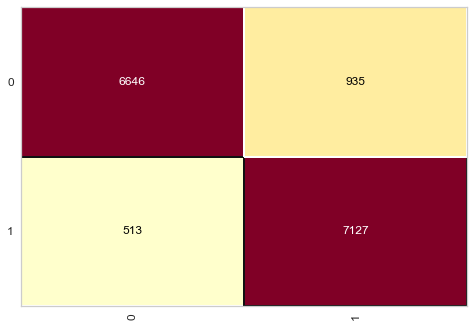

In [52]:
predictions = xtrees.predict(X_test)
confusion = confusion_matrix(y_test, predictions)
cm = ConfusionMatrix(xtrees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

In [ ]:


for key in test_sets:
    X, y = df_splitter(datasets[key])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1216)
    extrees_test = cross_val_score(extrees,X_train,y_train, n_jobs=-1, cv=3, scoring='accuracy') #Default cv value = 5
    first_results.append({'model':'Extra Trees', 'dataset':key, 'score':extrees_test.mean()})
    print(f'\n-----\nDataset: {key}')
    display_scores(extrees_test)
    
    (*, criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
     random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
a

#### Random Forest

#### Adaboost

Extra trees - oversampled+ e -
Random Forest - oversampled +-
adaboost - smote-

